<a href="https://colab.research.google.com/github/sebastiant93/Reto_Aprendizaje_No_Supervisado/blob/main/Reto_Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto| Segmentación de empleados
##Presentado por: Sebastián Torres Franco
##Presentado a: Profesor Andrés Eduardo Gutiérrez

#2) Carga los datos del archivo.

Crea un DataFrame en pandas para el archivo

In [1]:
#***************************************Importación de librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go

In [2]:
#***************************************Se carga el archivo solicitad
df_train=pd.read_csv("/content/Train.csv")
df_train.head()#Se imprimen los encabezados del archivo como muestra del resultado

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  ...  Compensation_and_Benefits  Work_Life_balance  \
0                     4  ...                      type2                3.0   
1                     4  ...                      type2                4.0   
2                     3  ...                      type2                1.0   
3                     3  ...                      type2                1.0   
4                     4  ...                      type3                3.0   

   VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  
0     4  0.7516  1.8688   2.0     4     5     3          0.1841  
1     3 -0.9612 -0.4537   2.0     3     5     3          0.0670  
2     4 -0.9612 -0.4537   3.0     3     8     3          0.0851  
3     3 -1.8176 -0.4537   NaN     3     7     3          0.0668  
4     1  0.7516 -0.4537   2.0     2     8     2          0.1827  

[5 rows x 24 columns]

#3) Transforma los datos según las características de las variables

* Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.
* La selección de las variables y de estos métodos depende del modelo de su solución y será evaluada su pertenencia según los datos

#Propuesta:
Se trasforman los datos categóricos del dataframe usando OneHotEncoder, y OrdinalEncoder de acuerdo a la cantidad de categorías de cada variable.

* Se usa OneHotEncoder para las variables: **_Relationship_Status_**, **_Decision_skill_possess_** por tener menos categorías.
* Se usa OrdinalEncoder para las variables: **_Hometown_**, **_Unit_**, **_Compensation_and_benefits_** por tener más categorías
* Se rellenan los valors NaN de las columnas con el respectivo promedio

In [3]:
#*********************************************************************************************************************************************************
#Después de estudiar las variables categóricas de la base de datos, se escoge transformarlas usando OneHotEncoder y Ordinal encoder de la siguiente manera.
  #OrdinalEncoder: Se agrupan las características con más categorías -> Hometown, Unit, Compensation_and_Benefits
  #OneHotEncoder: Se agrupan las características con menos categorías -> Relationship_Status, Decision_skill_possess
#*********************************************************************************************************************************************************

#Se rellenan valores NaN con valores promedio por columna
for col_name in df_train.columns:
    if df_train[col_name].dtypes != "object":
       df_train[col_name]=df_train[col_name].fillna(df_train[col_name].mean().round(0))

df_train2=df_train.copy() #Se realiza una copia para no afectar datos originales

#Se elimina la columna "Employee_ID", que no brinda y "Gender" tampoco debería afectar una clasificación
df_train2.drop(["Employee_ID","Gender"],axis=1,inplace=True)

list_OHE=["Relationship_Status","Decision_skill_possess"] #Lista de variables a transformar con OneHotEncoder (OHE)
list_ORE=["Hometown","Unit","Compensation_and_Benefits"] #Lista de variables a transformar con OrdinalEncoder (ORE)

#Se transforman las variables seleccionadas con OneHotEncoder usando el metodo get_dummies de Pandas
df_train2=pd.get_dummies(df_train2,prefix="Clase_",columns=list_OHE)

#Se transforman las variables seleccionadas con OrdinalEncoder
ORE=OrdinalEncoder()
for col_name in list_ORE: #Se recorre la lista de variables categoricas que se transforman con ORE
    df_train2[col_name]=ORE.fit_transform(df_train2[[col_name]]) #Se realiza la transformación.




df_train2.head() #Se imprime head como muestra del resultado

Age  Education_Level  Hometown  Unit  Time_of_service  \
0  42.0                4       1.0   2.0              4.0   
1  24.0                3       3.0   3.0              5.0   
2  58.0                3       0.0   8.0             27.0   
3  26.0                3       2.0   1.0              4.0   
4  31.0                1       3.0   3.0              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  ...  \
0                     4           33            1           1        7.0  ...   
1                     4           36            0           3        6.0  ...   
2                     3           51            0           2        8.0  ...   
3                     3           56            1           3        8.0  ...   
4                     4           62            1           3        2.0  ...   

   VAR5  VAR6  VAR7  Attrition_rate  Clase__Married  Clase__Single  \
0     4     5     3          0.1841               1              0   
1     3     5     3          0.0670               0              1   
2     3     8     3          0.0851               1              0   
3     3     7     3          0.0668               0              1   
4     2     8     2          0.1827               1              0   

   Clase__Analytical  Clase__Behavioral  Clase__Conceptual  Clase__Directive  
0                  0                  0                  1                 0  
1                  1                  0                  0                 0  
2                  0                  0                  1                 0  
3                  0                  1                  0                 0  
4                  0                  0                  1                 0  

[5 rows x 26 columns]

#4) Selecciona el número de grupos adecuados para agrupar usando K-means

* Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.

* Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

##Propuesta

En la visualización de resultados mediante diagramas de dispersión se asume que la variable de salida corresponde a la característica **_Attrition_rate_**, ya que el desgaste puede estar muy relacionado a la decersión del empleado. Esta gráfica se visualiza en función de la variable **_Time_Of_Service_**. Sin embargo, no se logran visualizar de forma clara los agrupamientos.

Luego de analizar el gráfico K-Elbow y el gráfico Silhouette se opta por escoger 8 clusters. Esto a razón de que el número de agrupamientos presenta codos tanto con el índice de Silhouette como en el de Calinski_Harabasz, y también a que el gráfico de Silhouette muestra grupos bien balanceados sin datos negativos.

Text(0.5, 0.98, 'Gráfica K-Elbow para Silhouette Index y Calinski_Harabasz Index')

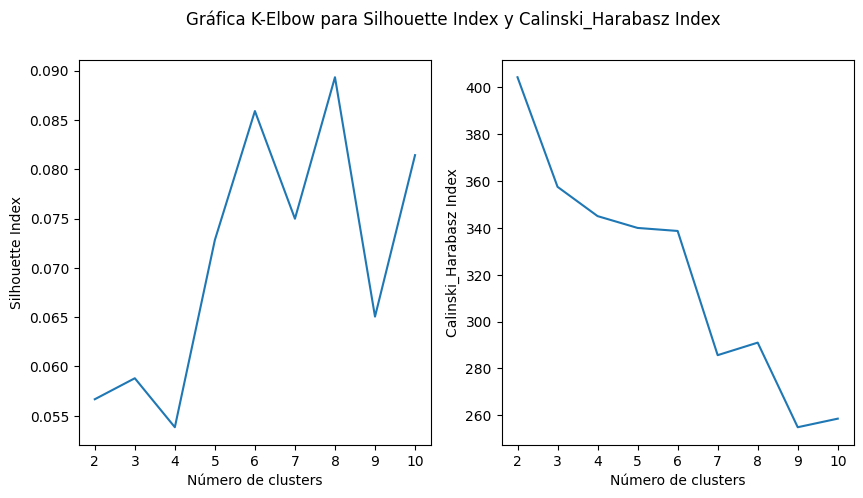

In [19]:
#**************** Como primer paso se estandarizan los datos antes del agrupamiento
stand_scaler=StandardScaler() #Se guarda el objeto de estandarización
Xtrain=stand_scaler.fit_transform(df_train2) #se estandarizan los datos.

#**************** Se genera una gráfica de K-elbow de acuerdo con el número de grupos para los índices Silhouette y Carl
n_Cluster=[] #Cantidad de grupos formados
index_cluster_silh=[] #índice de calidad de agrupamiento para cada cantidad de agrupamiento con silhouette
index_cluster_cals=[] #índice de calidad de agrupamiento para cada cantidad de agrupamiento con calinski_harabasz
y_pred={} #Diccionario para almacenar la segmentación de datos
for k in range(2,11): #Se genera la gráfica para hasta 10 grupos
    n_Cluster.extend([k]) #Se almacena la cantidad de clusters
    y_pred[k]=KMeans(n_clusters=k,n_init="auto").fit_predict(Xtrain) #Se realiza el agrupamiento en k clusters
    index_cluster_silh.extend([silhouette_score(Xtrain,y_pred[k])]) # Se calcula y almacena el índice de silhouette
    index_cluster_cals.extend([calinski_harabasz_score(Xtrain,y_pred[k])]) #Se calcula y almacena el índice de calinski_harabasz

#Se crea el gráfico de índices vs cantidad de grupos
fig_kelbow,axs=plt.subplots(ncols=2,figsize=(10,5))
axs[0].plot(n_Cluster,index_cluster_silh)
axs[0].set_xlabel("Número de clusters")
axs[0].set_ylabel("Silhouette Index")
axs[0].set_xticks(range(2,11))

axs[1].plot(n_Cluster,index_cluster_cals)
axs[1].set_xlabel("Número de clusters")
axs[1].set_ylabel("Calinski_Harabasz Index")
axs[1].set_xticks(range(2,11))
plt.suptitle("Gráfica K-Elbow para Silhouette Index y Calinski_Harabasz Index")

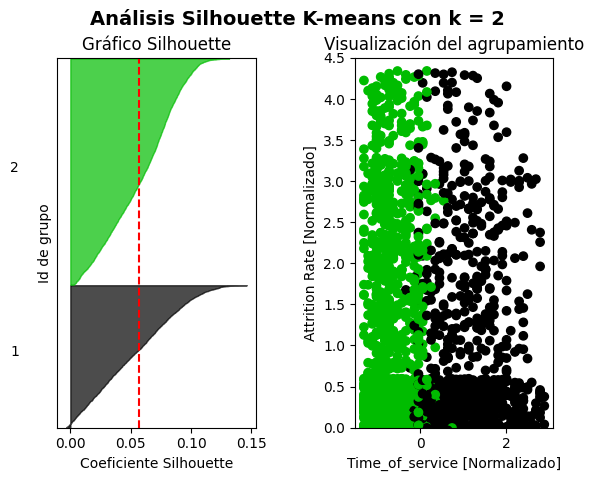

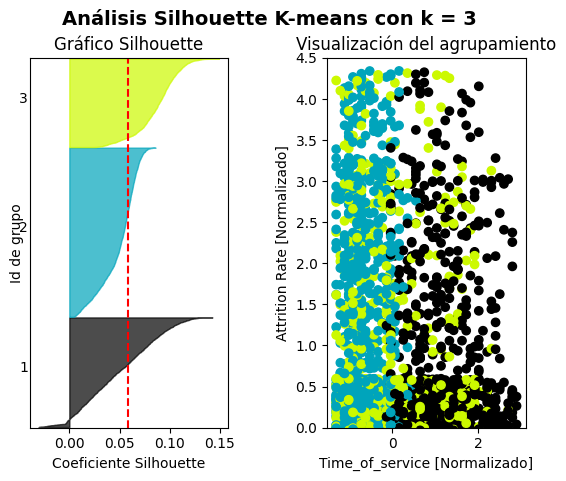

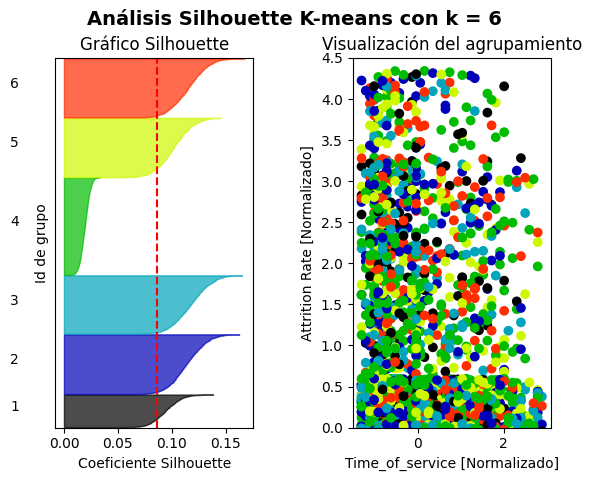

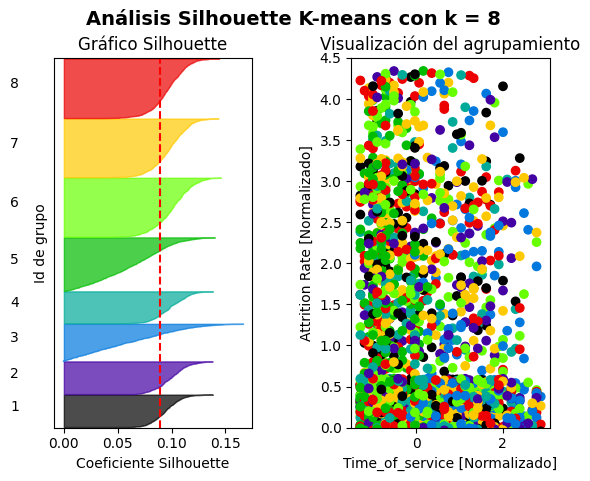

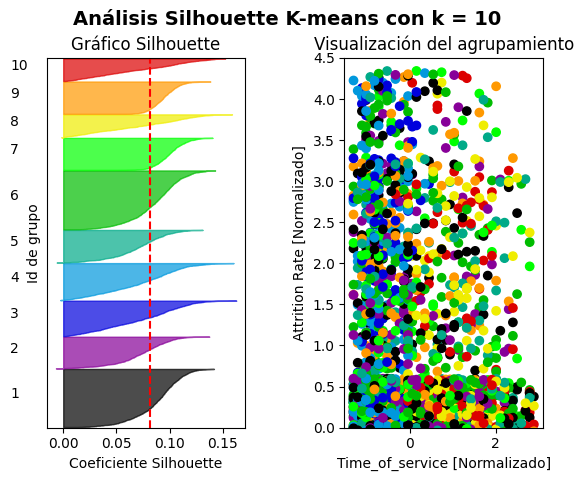

In [157]:
#**************** Definición de funciones

def slih_plot(list_clusters,X,y_pred,col_x,col_y,n_groups=8):
#Descripción: Función encargada de realizar el gráfico de silhouette para una lista de grupos.
#Argumentos & Variables:
  #list_clusters=Lista con la cantidad de clusters a formar en cada iteración
  #X: Data transformada (Estandarizada,normalizada,etc.)
  #y_pred: Diccionario con predicciones de grupo sobre el set de datos
  #col_x: Columna de datos con variable x para scatter plot
  #col_y: Columna de datos con variable y para scatter plot
#Return:
  #fig_sh: Gráfico de silhouette para número de grupos escogidos

    list_fig=[]
    for k in list_clusters:
      fig,(ax0,ax1)=plt.subplots(1,2)
      plt.subplots_adjust(wspace=0.5, hspace=1)
      fig_set_size_inches=(15,5)
      # The (k+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax0.set_ylim([0, len(X) + (k + 1) * 10])
      silhouette_avg = silhouette_score(X, y_pred[k])
      sample_silhouette_values = silhouette_samples(X, y_pred[k])
      y_lower = 10
      for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred[k] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax0.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
      ax0.set_title("Gráfico Silhouette")
      ax0.set_xlabel("Coeficiente Silhouette")
      ax0.set_ylabel("Id de grupo")
      ax0.set_yticks([])  # Clear the yaxis labels / ticks
      # The vertical line for average silhouette score of all the values
      ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(y_pred[k].astype(float) / k)
      ax1.scatter(X[:, col_x], X[:, col_y], c=colors)
      ax1.set_ylim(0, 4.5)
      ax1.set_title("Visualización del agrupamiento")
      ax1.set_xlabel("Time_of_service [Normalizado]")
      ax1.set_ylabel('Attrition Rate [Normalizado]')
      plt.suptitle(("Análisis Silhouette K-means "
                    "con k = %d" % k),
                    fontsize=14, fontweight='bold')
      if k== n_groups:
        fig_sh=fig

    plt.show()
    return fig_sh
#**************** Se genera una gráfica Silhouette para 2,3,6,8,10 agrupaciones
list_clusters=[2,3,6,8,10] #Lista de agrupamientos a graficar
col_x=np.where(df_train2.columns=="Time_of_service") #Columna para variable x del plot de dispersión
col_y=np.where(df_train2.columns=="Attrition_rate") #Columna para la variable y del plot de dispersión
fig_sh=slih_plot(list_clusters,Xtrain,y_pred,col_x,col_y)



#5) Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo

Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

In [97]:
k_selected=8 #Número de clusters escogidos

#Se realiza una copia del dataframe original, agregando la columna groups para poder segmentar los datos. Esto se toma de acuerdo con el número de agrupamientos seleccionado
df_train3=df_train.copy()
df_train3.drop(["Employee_ID","Gender"],axis=1,inplace=True) #Se eliminan las columnas que se habían definido como no relevantes
df_train3["Groups"]=y_pred[k_selected] #Se agrega la columna que se usará para la segmentación

#Se crea el dataframe con la estructura de la tabla resumen
df_statistics=pd.DataFrame(columns=["Grupo_" + str(i+1) for i in range(k_selected)],index=df_train3.columns[:-1]) #Se omite columna Groups, porque esta corresponde al agrupamiento que se realizó, no a datos.

for col_name in df_train3.columns[:-1]: #Se recorren las variables en el dataframe con los datos seleccionados como relevantes. Se omite columna Groups, porque esta es para segregación de datos.
    for id_group in range(k_selected):
        if df_train[col_name].dtypes != "object" : #Sobre el dataframe original se valida si la variable es cuantitativa. En este caso se calcula la media de la característica para cada grupo
           df_statistics.loc[col_name,f"Grupo_{id_group+1}"] = df_train.loc[df_train3["Groups"]==id_group,col_name].mean()
        else: #En caso de variables categóricas se calcula la moda sobre el dataframe con los datos originales
           df_statistics.loc[col_name,f"Grupo_{id_group+1}"] = df_train.loc[df_train3["Groups"]==id_group,col_name].value_counts().keys()[0]

df_statistics

Grupo_1    Grupo_2     Grupo_3     Grupo_4  \
Age                          39.754019  39.898089   52.853727   38.597064   
Education_Level               3.151125    3.16242    3.154712    3.207178   
Relationship_Status             Single     Single     Married      Single   
Hometown                   Springfield    Lebanon     Lebanon     Lebanon   
Unit                                IT         IT          IT          IT   
Decision_skill_possess      Conceptual  Directive  Behavioral  Analytical   
Time_of_service              13.496785      13.75   23.686357   12.556281   
Time_since_promotion          2.332797   2.393312    2.661041      2.2969   
growth_rate                  47.200965  47.724522   46.067511    47.22186   
Travel_Rate                   0.827974   0.781847    0.807314    0.853181   
Post_Level                    2.858521   2.783439    2.814346    2.805873   
Pay_Scale                     6.101286   5.958599    6.087201    6.017945   
Compensation_and_Benefits        type2      type2       type2       type2   
Work_Life_balance             2.342444   2.452229    2.351617    2.371941   
VAR1                          3.088424   3.093949     3.09564    3.094617   
VAR2                         -0.007718  -0.032051    0.036079   -0.031266   
VAR3                         -0.005649   0.056637   -0.014374   -0.002859   
VAR4                          1.942122   1.907643    1.917018    1.900489   
VAR5                          2.784566   2.882166    2.872011    2.810767   
VAR6                          7.117363   6.992038    7.199719    7.079935   
VAR7                          3.302251   3.285032    3.293952    3.305057   
Attrition_rate                 0.20804   0.187584    0.168492    0.185079   

                              Grupo_5     Grupo_6    Grupo_7     Grupo_8  
Age                         31.036098   39.766314  39.891556   39.148862  
Education_Level               3.22439    3.159612   3.192889    3.222417  
Relationship_Status           Married     Married    Married     Married  
Hometown                      Lebanon     Lebanon    Lebanon     Lebanon  
Unit                               IT          IT         IT          IT  
Decision_skill_possess     Behavioral  Conceptual  Directive  Analytical  
Time_of_service              6.532683    13.33157  13.572444   13.125219  
Time_since_promotion         2.230244     2.30776   2.405333    2.370403  
growth_rate                 46.947317   47.161376  47.115556   47.120841  
Travel_Rate                  0.832195    0.840388   0.810667    0.791594  
Post_Level                   2.845854     2.77425   2.764444    2.772329  
Pay_Scale                    6.020488    5.910053   6.074667     5.93958  
Compensation_and_Benefits       type2       type2      type2       type2  
Work_Life_balance            2.370732    2.411817   2.374222    2.409807  
VAR1                         3.113171    3.097002   3.121778    3.076182  
VAR2                        -0.037786   -0.010306   0.005302    0.009371  
VAR3                        -0.034538   -0.006219  -0.057346   -0.007319  
VAR4                         1.877073    1.887125   1.885333    1.917688  
VAR5                         2.801951    2.852734   2.866667    2.802102  
VAR6                         7.119024     7.08642   7.086222    7.116462  
VAR7                         3.230244    3.230159   3.247111    3.228546  
Attrition_rate               0.188785    0.187374   0.197227     0.19029

#6a) Interpreta los resultados obtenidos

* Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo

##Propuesta
Se generan dos gráficas para el análisis de resultados.

* Una gráfica de barras comparativa de las características por grupo
* Una gráfica de estadísticos compartivos por grupo para verificar el peso de cada característica.


In [98]:
#******************************* Procedimiento gráfica de barras ************************************************************

#******************************* Preparación de datos

#Se seleccionan las columnas de variables cuantitativas para el plot
var_quant=df_train3.dtypes[df_train3.dtypes != "object"].index[:-1] #No se considera la variable groups

#Se transpone el dataframe, y se estandarizan las variables cuantitativas
X_bar=stand_scaler.fit_transform(df_statistics.loc[var_quant].T.to_numpy())
#Se garantiza que no hayan barras con valores negativos
X_bar=X_bar+np.abs(np.min(X_bar))

#******************************* Se genera la gráfica de barras

fig_bar = go.Figure() #Creamos la figura
for j in range(k_selected):  #Recorremos las grupos
      fig_bar.add_trace(go.Bar( #Agregamos una gráfica de barras
           y=X_bar[j,:], #Tomamos el valor de Y
           x=var_quant, #Lo que estamos haciendo es escribiendo los valores "x", que son las características, pero en cada iter del for se sobrescriben.
           name='Grupo '+str(j+1))) #Nombre de la variable en x
      fig_bar.update_layout(
      title='Promedio de variable por grupo',
      yaxis_title='Valores estandarizados',
      margin=dict(l=50, r=50, t=50, b=50))
fig_bar


In [100]:
#******************************* Procedimiento gráfica de bigotes ************************************************************


#******************************* Preparación de datos
#Se ordenan los valores por grupo para que el gráfico de bigotes salga ordenado.
df_train3["Groups"]=y_pred[6]
df_train3=df_train3.sort_values(by="Groups")
X_box=stand_scaler.fit_transform(df_train3[var_quant]) #Se toman los datos cunatitativos del dataframe original y se estandarizan
x=["Grupo "+str(g) for g in df_train3["Groups"]] # Se almacena una lista con los grupos generados con 6 clusters

fig_box=go.Figure() #Se crea la figura
for j in range(len(var_quant)): #Recorremos las variables cuantitativas
    fig_box.add_trace(go.Box( #Agregamos la figura
        y=Xtrain[:,j], #Tomamos los valores estandarizados
        x=x, #Se asigna el label del grupo
        boxpoints=False,
        name= var_quant[j])) #En cada iteración se agregará un nuevo trace

fig_box.update_layout(
    title="Variables por grupo",
    yaxis_title="valores estandarizados",
    boxmode="group",)
fig_box.show()

#6b) Historia
* Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.

## **Estudio Deserción de empleados**
Con la finalidad de estudiar posibles causas relacionadas con la deserción de empleados, se realizó un estudio sobre 7000 trabajadores. Del estudio se pueden extraer las siguientes conclusiones:



### **Grupos de empleados**
De acuerdo con las variables estudiadas, los 7000 empleados se pueden clasificar en 8 grupos diferentes. Esta clasificación se realizó para conseguir segmentar grupos de empleados que presentaran características similares entre sí. La elección del número de grupos se realizó mediante una inspección de los gráficos k_elbow y silhouette mostrados a continuación.

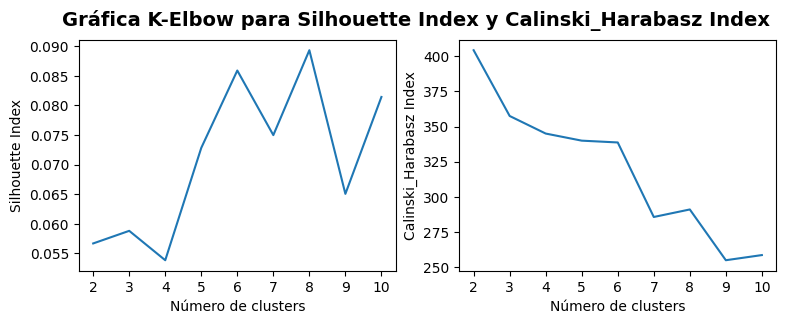

In [159]:
fig_kelbow.suptitle("Gráfica K-Elbow para Silhouette Index y Calinski_Harabasz Index",fontsize=14, fontweight='bold')
fig_kelbow.set_size_inches(9,3)
fig_kelbow

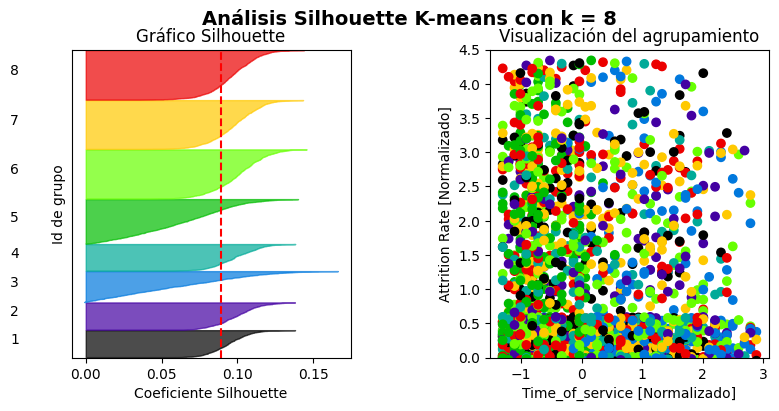

In [158]:
fig_sh.set_size_inches(9,4)
fig_sh

### **Conclusiones del agrupamiento**

A partir del gráfico de barras mostrado a continuación, se pueden tomar las siguientes conclusiones.

1. Del agrupamiento se puede distinguir que el mayor desgaste laboral "Attrition Rate", se produce en el Grupo-1 y en el Grupo-3. Estos grupos también presentan las más altas escalas de paga, tasas de viaje considerable, una alta tasa de crecimiento. Sim emargo, presentan la tasa educativa más baja. De esto se puede sospechar que pueden ser trabajadores cuyas tareas se estén dificultando por falta de una debida capacitación, y una alta demanda de viaje relacionado con trabajo.

2. Por otra parte el grupo que presentó el menor desgaste laboral son los de mayor edad, y que tienen mayor tiempo de servicio en la empresa. El grupo puede corresponder con trabajadores que por su antigüedad ya están acostumbrados al modus operandi de la empresa, o que incluso pueden estar cercanos a etpas de jubilación.

3. Los demás grupos presentaron tasas de desgaste similar, sin embargo se observa que los trabajadores del Grupo-2 tienden a presentar un desgaste laboral un poco más reducido que puede estar relacionado con su relativamente alto balance entre vida personal y laboral.


In [160]:
fig_bar

Por otro lado del gráfico de Cajas se puede observar que:

1. El crecimiento laboral es una de las variables que más disperasas dentro de cada grupo.

2. Exceptuando el Grupo-2, el desgaste laboral tiende a concentrarse hacia valores altos en cada grupo.


In [161]:
fig_box